Carga de los datos y librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

hpv_data= pd.read_csv('/content/hpv_data.csv')
hpv_data.tail()

# Analisis de la correlacion entre el tipo de displasia y los geneotipos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

displasia_mapping = {'NILM': 0, 'LGSIL': 1, 'HGSIL': 2, 'ICC': 3, 'CACU': 3}
hpv_data['Tipo displasia Encoded'] = hpv_data['Tipo displasia'].map(displasia_mapping)

genotype_columns = hpv_data.columns[2:-1]  # Excluyendo la columna de edad y la última

correlation_matrix = hpv_data[genotype_columns].corrwith(hpv_data['Tipo displasia Encoded'])
correlation_matrix_sorted = correlation_matrix.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_matrix_sorted.values, y=correlation_matrix_sorted.index,palette='viridis' )
plt.title('Correlación entre Genotipos de HPV y Tipo de Displasia')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Genotipo de HPV')
plt.show()

correlation_matrix_sorted


Genotipos con Mayor Correlación Positiva: Los genotipos 51, 16 y 33 tienen las correlaciones más altas y positivas con el tipo de displasia. Esto indica que estos genotipos están más fuertemente asociados con tipos de displasia más severos (HGSIL, ICC, CACU).

Genotipos con Correlación Negativa o Baja: Algunos genotipos, como el 6 y el 11, muestran una correlación negativa o muy baja. Esto sugiere una asociación menos significativa o incluso inversa con los tipos de displasia más severos.

Genotipos sin Correlación Significativa (NaN): Algunos genotipos, como el 26, 64, 69 y 73, no tienen correlaciones calculadas (NaN), lo que podría deberse a la falta de variabilidad o presencia en su muestra.
Altos Valores Positivos de Correlación: Indican una asociación más fuerte con formas más severas de displasia o cáncer cervical. Por ejemplo, el genotipo 51, que mostró la correlación positiva más alta, tiene una asociación más fuerte con 'CACU'.

Valores Negativos o Bajos de Correlación: Significan que el genotipo tiene una asociación menor o inversa con las formas más severas de displasia o cáncer cervical.

NaN: Geneotipos que no tienen ninguna correlacion con el tipo de displasia.

**Un genotipo con una correlación positiva alta no necesariamente causa las formas más severas de displasia, pero podría ser un factor de riesgo o un marcador biológico asociado con la severidad de la enfermedad. Estos hallazgos pueden ser útiles para comprender mejor cómo ciertos genotipos del virus del papiloma humano están relacionados con el desarrollo de lesiones cervicales y cáncer cervical.



*   La variedad en las magnitudes de correlación sugiere que diferentes genotipos del VPH pueden tener distintos niveles de influencia en la progresión de las lesiones cervicales y el cáncer cervical.
*   Algunos genotipos no mostraron una correlación significativa (NaN en los resultados). Esto podría indicar que estos genotipos no tienen un papel importante en la determinación de la severidad de la displasia cervical, o que su influencia no se puede capturar mediante un análisis de correlación lineal.


*   Los genotipos con fuertes correlaciones positivas podrían ser objetivos claves en el diagnóstico temprano y la prevención del cáncer cervical. Su identificación en pruebas de VPH podría ayudar a categorizar a los pacientes en grupos de riesgo más alto para una vigilancia más estrecha.
*   Elemento de lista





# Frecuencia de Genotipos de HPV en la Base de Datos'

In [ ]:
genotype_columns = hpv_data.columns[2:-1]
hpv_data[genotype_columns] = hpv_data[genotype_columns].apply(pd.to_numeric, errors='coerce')

genotype_frequencies = hpv_data[genotype_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genotype_frequencies.values, y=genotype_frequencies.index, palette='viridis')
plt.title('Frecuencia de Genotipos de HPV en la Base de Datos')
plt.xlabel('Frecuencia')
plt.ylabel('Genotipo de HPV')
plt.show()
genotype_frequencies

genotipo 51 es el mas frecuente
genotopi 16
no a`pareen los genotipos 26,69,64 y 73

# Frecuencia de Tipo de Displasia en la Base de Datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
displasia_counts = hpv_data['Tipo displasia'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=hpv_data, x='Tipo displasia', palette='coolwarm')
plt.title('Frecuencia de Tipo de Displasia en la Base de Datos')
plt.ylabel('Tipo de Displasia')
plt.xticks(rotation=45)
plt.show()
displasia_counts

Genotipos con Alta Correlación y Alta Frecuencia: Algunos genotipos, como el 51 y el 16, no solo son comunes en la base de datos sino que también tienen una correlación positiva significativa con tipos de displasia más severos. Esto sugiere que estos genotipos comunes podrían jugar un papel importante en el desarrollo de displasias cervicales más graves.

Genotipos Comunes con Correlación Negativa o Baja: Genotipos como el 6 y el 11, aunque relativamente comunes, muestran una correlación negativa o baja con la severidad de la displasia. Esto podría indicar que, aunque son frecuentes, estos genotipos podrían no estar tan fuertemente asociados con el desarrollo de displasias cervicales graves.
Genotipos Menos Comunes: Algunos genotipos con menor frecuencia, como el 33 y el 35, muestran una correlación positiva con la severidad de la displasia, lo que indica que, aunque no son tan comunes, pueden tener un impacto significativo en el desarrollo de displasias más severas.

Genotipos Ausentes o con Correlación Indeterminada: Los genotipos como el 26, 64, 69 y 73 no están presentes en la muestra o tienen una correlación indeterminada (NaN). Esto puede deberse a su baja prevalencia o a la falta de suficiente variabilidad en los datos para calcular una correlación significativaDe este gráfico

# Correlación entre edad y tipo de dispasia

In [76]:
displasia_mapping = {'NILM': 0, 'LGSIL': 1, 'HGSIL': 2, 'ICC': 3, 'CACU': 3}
hpv_data['Tipo displasia Encoded'] = hpv_data['Tipo displasia'].map(displasia_mapping)

edad_column = ['Edad']
correlation_matrix = hpv_data[edad_column].corrwith(hpv_data['Tipo displasia Encoded'])
print('correlacion entre edad y tipo de displasia:', correlation_matrix)


correlacion entre edad y tipo de displasia: Edad    0.45831
dtype: float64


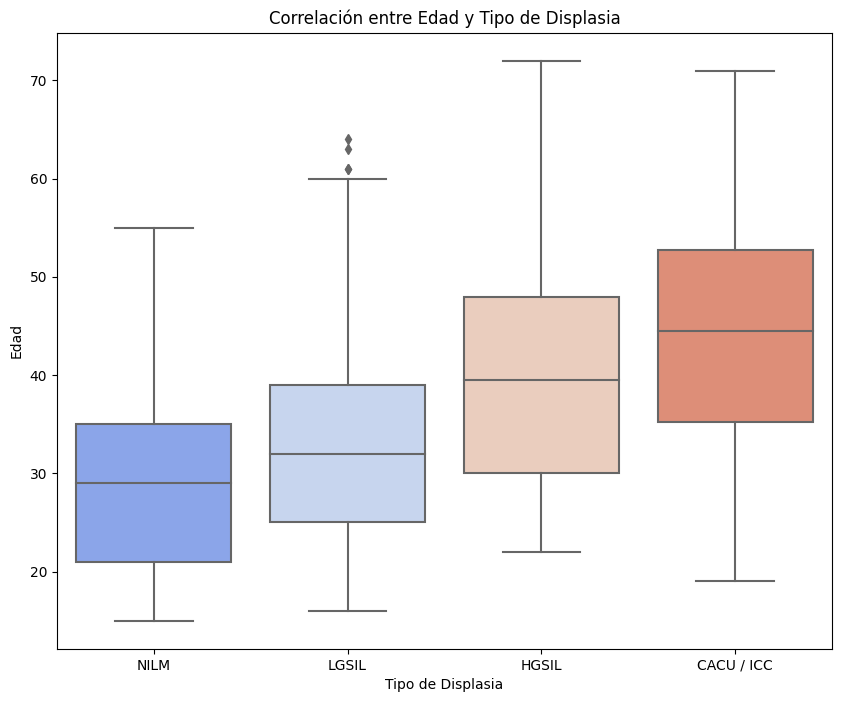

In [78]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=hpv_data, x='Tipo displasia Encoded', y='Edad', palette='coolwarm')
plt.title('Correlación entre Edad y Tipo de Displasia')
plt.xlabel('Tipo de Displasia')
plt.ylabel('Edad')
plt.xticks(ticks=[0, 1, 2, 3], labels=['NILM', 'LGSIL', 'HGSIL', 'CACU / ICC'])
plt.show()


In [ ]:
genotype_columns = hpv_data.columns[2:-1]
correlation_matrix = hpv_data[genotype_columns].corrwith(hpv_data['Edad'])
print('correlacion entre edad y genotipos:', correlation_matrix)

**ANALISIS**: **0.45831** Este resultado sugiere que existe una relación entre la edad y la severidad de la displasia, es una correlación positiva moderada. a medida que aumenta la edad de las mujeres, hay una **tendencia moderada** hacia tipos displasia más severos. sin embargo, aunque la correlación es positiva, no es extremadamente fuerte (no está cerca de 1), lo que significa que la edad podría ser solo uno de los varios factores que contribuyen a la severidad de la displasia.

# heatmap

In [ ]:

genotype_columns = hpv_data.columns[2:-1]  # las columnas de genotipo
displasia_column = 'Tipo displasia'

df_with_dummies = pd.get_dummies(hpv_data, columns=[displasia_column])


correlation_matrix = df_with_dummies.corr()

displasia_columns = [col for col in df_with_dummies.columns if col.startswith(displasia_column + '_')]

actual_genotype_columns = [col for col in genotype_columns if col in correlation_matrix.index]
actual_displasia_columns = [col for col in displasia_columns if col in correlation_matrix.columns]


filtered_correlation_matrix = correlation_matrix.loc[actual_genotype_columns, actual_displasia_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlación entre Genotipos de VPH y Tipos de Displasia')
plt.xlabel('Tipos de Displasia')
plt.ylabel('Genotipos de VPH')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

-una correlacion postiva nos dice que es genotipo son mas prevalentes en mujeres mayores en nuestra base de datos
-negativa: (6 y CP) son mas comunes en menore


6, 31, 33, 51, y 35 son los genotipos asociados con displasis mas severas

# modelo con el tipo de displasia con la variable dependiente

**modelo de regresión logística multinomial**

In [80]:
import pandas as pd
import statsmodels.api as sm

X = hpv_data[['Edad']]
y = hpv_data['Tipo displasia Encoded']

X = sm.add_constant(X)
model = sm.MNLogit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 1.188824
         Iterations 6
                            MNLogit Regression Results                            
Dep. Variable:     Tipo displasia Encoded   No. Observations:                  883
Model:                            MNLogit   Df Residuals:                      877
Method:                               MLE   Df Model:                            3
Date:                    Sat, 25 Nov 2023   Pseudo R-squ.:                 0.08867
Time:                            00:49:09   Log-Likelihood:                -1049.7
converged:                           True   LL-Null:                       -1151.9
Covariance Type:                nonrobust   LLR p-value:                 5.034e-44
Tipo displasia Encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1161      0.300  

const (Constante): El término constante (también conocido como intercepto) para cuando 'Tipo displasia Encoded' es 1. Un valor de -1.1161 sugiere que, cuando la edad es 0, el logaritmo de la razón de probabilidades de tener LGSIL (tipo displasia = 1) en comparación con NILM (tipo displasia = 0, la categoría de referencia) es -1.1161.

In [79]:
age_values = np.linspace(hpv_data['Edad'].min(), hpv_data['Edad'].max(), 300)
X_new = pd.DataFrame({'Edad': age_values})
X_new = sm.add_constant(X_new)

predicted_probs = model.predict(X_new)

plt.figure(figsize=(10, 6))

for i in range(1, predicted_probs.shape[1]):
    plt.plot(age_values, predicted_probs.iloc[:, i], label=f'Tipo displasia {i}')

plt.xlabel('Edad')
plt.ylabel('Probabilidad Predicta')
plt.title('Probabilidad Predicta de Tipo de Displasia por Edad')
plt.legend(title='Tipo de Displasia')
plt.show()


NotFittedError: ignored

conteo

In [ ]:

data_description = hpv_data.describe()
data_null_values = hpv_data.isnull().sum()
class_distribution = hpv_data['Tipo displasia'].value_counts()

(data_description, data_null_values, class_distribution)


In [67]:
displasia_mapping = {'NILM': 0, 'LGSIL': 1, 'HGSIL': 2, 'ICC': 3, 'CACU': 3}
hpv_data['Tipo displasia Encoded'] = hpv_data['Tipo displasia'].map(displasia_mapping)
hpv_data = hpv_data.drop(['Unnamed: 38'], axis=1)
# Preparar las características (X) y la variable objetivo (y)
X = hpv_data.drop(['Tipo displasia', 'Tipo displasia Encoded'], axis=1)
y = hpv_data['Tipo displasia Encoded']

# Convertir todas las columnas de características a numéricas y manejar los valores no numéricos
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce').fillna(0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, multi_class='multinomial',class_weight= 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)



              precision    recall  f1-score   support

           0       0.78      0.87      0.82        69
           1       0.67      0.51      0.58       106
           2       0.41      0.34      0.37        62
           3       0.29      0.57      0.38        28

    accuracy                           0.57       265
   macro avg       0.54      0.57      0.54       265
weighted avg       0.60      0.57      0.57       265



Modelo de prediccion

In [52]:
# Evaluar con validación cruzada
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='accuracy')

# Mostrar resultados
print(f"Accuracy (cross-validated): {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


Accuracy (cross-validated): 0.51 (+/- 0.17)


In [72]:

displasia_mapping = {'NILM': 0, 'LGSIL': 1, 'HGSIL': 2, 'ICC': 3, 'CACU': 3}
hpv_data['Tipo displasia Encoded'] = hpv_data['Tipo displasia'].map(displasia_mapping)
hpv_data = hpv_data.drop(['Tipo displasia', 'Unnamed: 38'], axis=1)

# Dividir los datos en características y objetivo
X = hpv_data.drop('Tipo displasia Encoded', axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)
y = hpv_data['Tipo displasia Encoded']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajuste del modelo con búsqueda de cuadrícula
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(grid_search.best_params_)

# Evaluar con validación cruzada
best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Mostrar resultados de la validación cruzada
print(f"Accuracy (cross-validated): {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Datos para predecir
data_to_predict = pd.DataFrame({
    'Edad': [22], '6': [0], '11': [0], '16': [1], '18': [0], '26': [0], '31': [0], '33': [1],
    '35': [0], '39': [0], '40': [0], '42': [0], '45': [0], '51': [0], '52': [0], '53': [0],
    '54': [0], '55': [0], '56': [0], '58': [0], '59': [0], '61': [1], '62': [1], '64': [0],
    '66': [0], '68': [0], '69': [1], '70': [0], '71': [0], '72': [0], '73': [0], '81': [0],
    '82': [0], '83': [1], '84': [0], 'IS39': [0], 'CP6108': [0]
}, index=[0])

predicted_class = best_model.predict(data_to_predict)

# Diccionario para traducir la clase predicha a su nombre original
displasia_types = {0: 'NILM', 1: 'LGSIL', 2: 'HGSIL', 3: 'ICC/CACU'}
predicted_displasia = displasia_types[predicted_class[0]]
print(f"La displasia predicha es: {predicted_displasia}")


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy (cross-validated): 0.51 (+/- 0.18)
La displasia predicha es: ICC/CACU
